In [2]:
import pandas as pd

df_m = pd.read_excel("data/2509인구현황.xlsx")

df_m

,※ 매월 말일자 통계 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,NaN,NaN,2025년09월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,남,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,행정기관코드,행정기관,남 인구수,연령구간인구수,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
3,0000000000,전국,"25,455,867","25,455,867","640,953","894,512","1,186,047","1,191,652","1,293,794","1,697,370",...,"2,153,243","2,068,068","1,924,820","1,369,706","1,018,102","815,668","526,968","218,964","52,528","7,456"
4,1100000000,서울특별시,"4,491,997","4,491,997","103,246","135,495","179,449","188,422","235,606","361,196",...,"367,229","349,737","343,643","254,228","193,251","138,768","79,043","30,894","7,917","1,179"
5,2600000000,부산광역시,"1,579,327","1,579,327","35,781","52,518","69,555","65,805","78,105","97,391",...,"138,978","144,567","149,308","113,779","82,585","59,799","34,087","12,682","2,930",386
6,2700000000,대구광역시,"1,154,611","1,154,611","27,891","41,932","54,837","54,474","61,513","73,387",...,"107,932","103,882","93,293","70,444","50,842","39,978","24,649","9,515","2,016",243
7,2800000000,인천광역시,"1,521,985","1,521,985","42,161","55,553","71,220","69,942","74,615","101,750",...,"130,811","127,222","110,861","70,915","51,363","38,824","25,040","10,853","2,831",443
8,2900000000,광주광역시,"689,326","689,326","17,746","26,842","36,660","37,707","41,293","49,455",...,"59,738","52,718","47,548","33,257","26,992","19,872","11,914","4,966","1,245",166
9,3000000000,대전광역시,"718,760","718,760","19,586","25,475","34,302","35,552","43,609","55,556",...,"60,130","55,931","51,220","35,502","25,405","19,734","12,175","5,176","1,251",189


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 엑셀 파일 읽기 (data 폴더)
df = pd.read_excel("data/2509인구현황.xlsx", header=4)

# 2. '전국' 행만 추출
row_all = df[df['행정기관'] == '전국'].iloc[0]

# 3. 남/여 연령별 컬럼명 리스트
age_cols_male = [
    '0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세',
    '40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','70~74세','75~79세',
    '80~84세','85~89세','90~94세','95~99세','100세 이상'
]
# 여자 컬럼은 남자랑 구조 동일 (남자 마지막 컬럼 기준 +3 ~ +24)
female_start_idx = df.columns.get_loc('100세 이상') + 3
age_cols_female = list(df.columns[female_start_idx : female_start_idx + 21])

# 4. 역방향 추출 (최연장자부터)
male_pop = [row_all[c] for c in age_cols_male][::-1]
female_pop = [row_all[c] for c in age_cols_female][::-1]
age_labels = age_cols_male[::-1]

# 5. 인구 피라미드 그리기
y = np.arange(len(age_labels))
plt.figure(figsize=(10,8))
plt.barh(y, [-x for x in male_pop], label='남자', color='#6495ED')
plt.barh(y, female_pop, label='여자', color='#FFB6C1')
plt.yticks(y, age_labels)
plt.xlabel('인구 수')
plt.title('2025년 9월 전국 남녀 인구 피라미드')
plt.legend()
plt.grid(axis='x', ls=':')
plt.tight_layout()
plt.show()

KeyError: '행정기관'

In [10]:
import pandas as pd

# 헤더 위치, B4면 header=3 (엑셀에서는 4번째 행)
df = pd.read_excel("data/2509인구현황.xlsx", header=3)
print(df.columns)  # <-- 컬럼 확인, 이름 반드시 체크

row_all = df[df['행정기관'] == '전국'].iloc[0]  # 컬럼명이 '행정기관' 맞을 때 작동

Index(['행정기관코드', '행정기관', '남 인구수', '연령구간인구수', '0~4세', '5~9세', '10~14세',
       '15~19세', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세',
       '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세',
       '85~89세', '90~94세', '95~99세', '100세 이상', '여 인구수', '연령구간인구수.1', '0~4세.1',
       '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1', '30~34세.1',
       '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1', '60~64세.1',
       '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1', '90~94세.1',
       '95~99세.1', '100세 이상.1'],
      dtype='object')


TypeError: unsupported operand type(s) for +: 'int' and 'ellipsis'

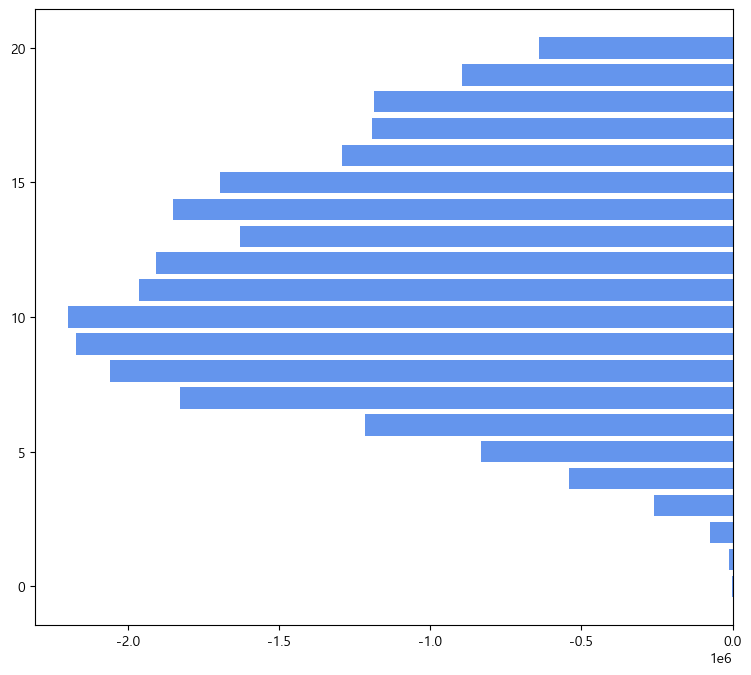

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시 데이터
male_pop = [1522, 11884, 73628, 261655, 541083, 832517, 1216148, 1827166, 2059326, 2173595, 2197751, 1964714, 1908160, 1629708, 1852682, 1697370, 1293794, 1191652, 1186047, 894512, 640953]
female_pop = [...]  # 이하 동일 방식

y = np.arange(len(male_pop))
plt.figure(figsize=(9,8))
plt.barh(y, [-x for x in male_pop], label='남자', color='#6495ED')
plt.barh(y, female_pop, label='여자', color='#FFB6C1')

# y축 반전
plt.gca().invert_yaxis()

# 인구수 표시 (만 명 단위)
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(abs(x)//10000)}만"))

plt.yticks(y)  # 연령대 따로 지정
plt.xlabel('인구 수 (단위: 만 명)')
plt.title('2025년 9월 전국 남녀 인구 피라미드')
plt.legend()
plt.grid(axis='x', ls=':')
plt.tight_layout()
plt.show()

In [14]:
print(male_pop)      # 혹은 print(female_pop)

[np.int64(1522), np.int64(11884), np.int64(73628), np.int64(261655), np.int64(541083), np.int64(832517), np.int64(1216148), np.int64(1827166), np.int64(2059326), np.int64(2173595), np.int64(2197751), np.int64(1964714), np.int64(1908160), np.int64(1629708), np.int64(1852682), np.int64(1697370), np.int64(1293794), np.int64(1191652), np.int64(1186047), np.int64(894512), np.int64(640953)]


컬럼명 확인: Index(['행정기관코드', '행정기관', '남 인구수', '연령구간인구수', '0~4세', '5~9세', '10~14세',
       '15~19세', '20~24세', '25~29세', '30~34세', '35~39세', '40~44세', '45~49세',
       '50~54세', '55~59세', '60~64세', '65~69세', '70~74세', '75~79세', '80~84세',
       '85~89세', '90~94세', '95~99세', '100세 이상', '여 인구수', '연령구간인구수.1', '0~4세.1',
       '5~9세.1', '10~14세.1', '15~19세.1', '20~24세.1', '25~29세.1', '30~34세.1',
       '35~39세.1', '40~44세.1', '45~49세.1', '50~54세.1', '55~59세.1', '60~64세.1',
       '65~69세.1', '70~74세.1', '75~79세.1', '80~84세.1', '85~89세.1', '90~94세.1',
       '95~99세.1', '100세 이상.1'],
      dtype='object')


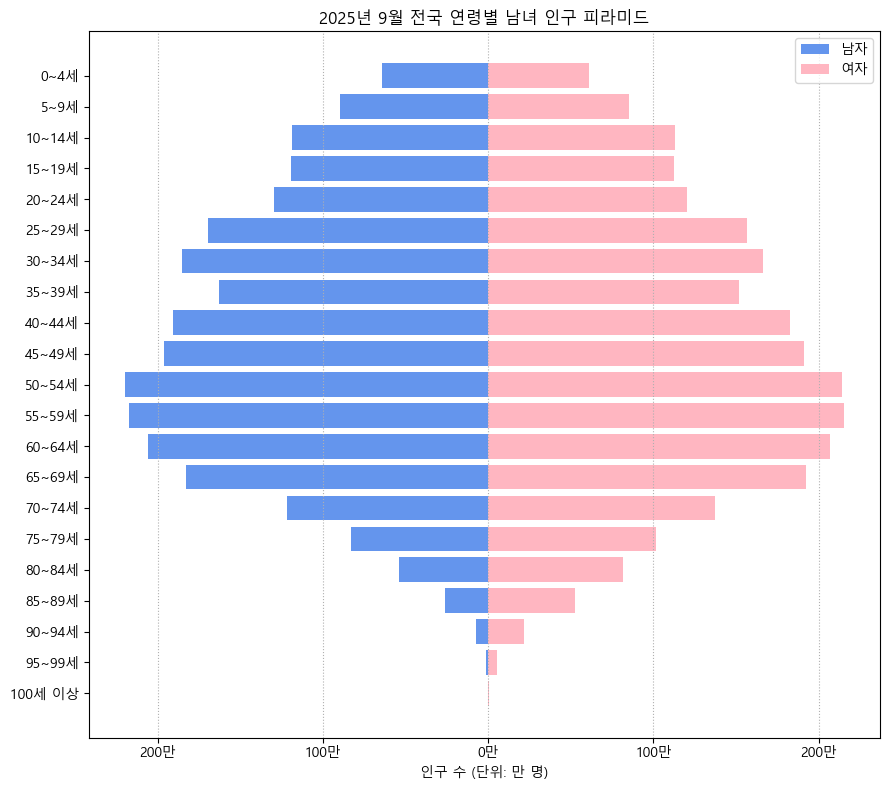

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import os

# 1. 파일 경로 지정 및 확인
f = r'C:\Users\75050\Desktop\WIA\lecture Source\03_Matplotlib-main\data\2509인구현황.xlsx'

if not os.path.exists(f):
    print("파일 경로를 다시 확인해주세요!")
else:
    # 2. 데이터 읽기 (헤더는 4번째 줄부터라고 가정)
    df = pd.read_excel(f, skiprows=3)

    # 3. 컬럼명 확인 후 남/여 구간 컬럼명 추출
    print("컬럼명 확인:", df.columns)

    # 남/여 연령별 인구 컬럼명 자동 추출 (남/여 각각 21개 컬럼)
    # 컬럼명에서 '0~4세' 부터 '100세 이상' 찾기
    start_idx = df.columns.get_loc('0~4세')            # 남자 첫 구간
    end_idx = df.columns.get_loc('100세 이상') + 1     # 남자 마지막 구간 +1

    start_idx_f = df.columns.get_loc('0~4세.1')        # 여자 첫 구간 (.1이 붙음)
    end_idx_f = df.columns.get_loc('100세 이상.1') + 1 # 여자 마지막 구간 +1

    male_cols = df.columns[start_idx:end_idx]
    female_cols = df.columns[start_idx_f:end_idx_f]

    # 4. "전국" 행만 추출
    total_row = df[df["행정기관"]=="전국"].iloc[0]

    # 5. 남/녀 인구수 리스트 만들기
    male_pop = [total_row[col] for col in male_cols]
    female_pop = [total_row[col] for col in female_cols]

    # 6. x축 라벨
    age_labels = list(male_cols)

    # 7. 그래프 그리기
    y = np.arange(len(age_labels))

    plt.figure(figsize=(9,8))
    plt.barh(y, [-x for x in male_pop], label='남자', color='#6495ED')
    plt.barh(y, female_pop, label='여자', color='#FFB6C1')
    plt.gca().invert_yaxis()
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(abs(x)//10000)}만"))
    plt.yticks(y, age_labels)
    plt.xlabel('인구 수 (단위: 만 명)')
    plt.title('2025년 9월 전국 연령별 남녀 인구 피라미드')
    plt.legend()
    plt.grid(axis='x', ls=':')
    plt.tight_layout()
    plt.show()

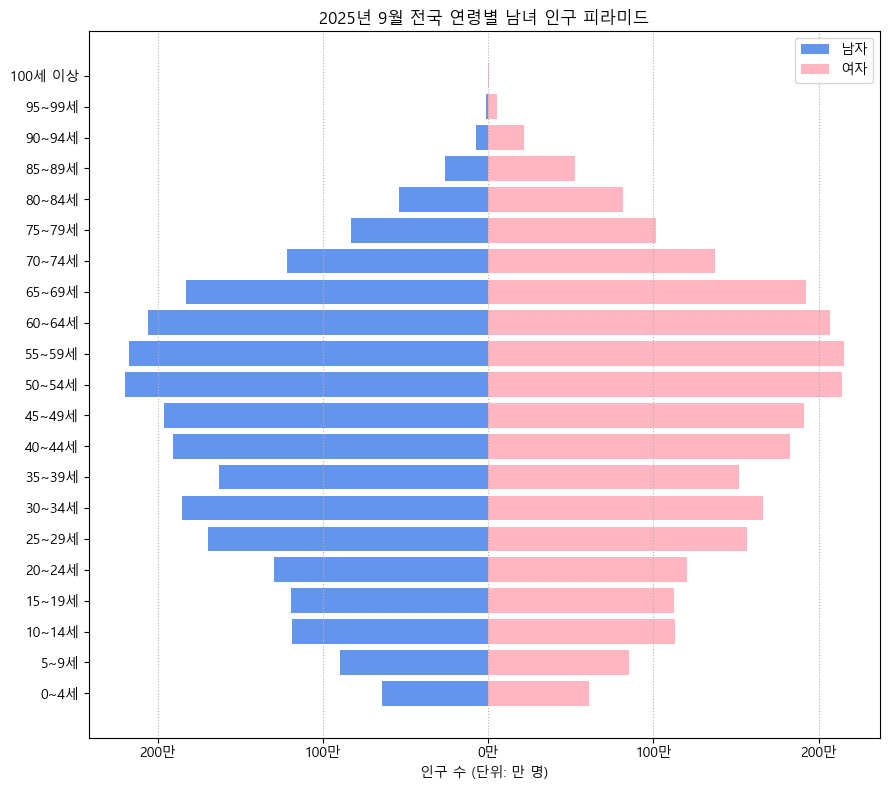

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

f = r'C:\Users\75050\Desktop\WIA\lecture Source\03_Matplotlib-main\data\2509인구현황.xlsx'
df = pd.read_excel(f, skiprows=3)

# 남녀 인구 컬럼명 자동 추출
start_idx = df.columns.get_loc('0~4세')
end_idx = df.columns.get_loc('100세 이상') + 1
start_idx_f = df.columns.get_loc('0~4세.1')
end_idx_f = df.columns.get_loc('100세 이상.1') + 1
male_cols = df.columns[start_idx:end_idx]
female_cols = df.columns[start_idx_f:end_idx_f]
total_row = df[df["행정기관"]=="전국"].iloc[0]
male_pop = [total_row[col] for col in male_cols]
female_pop = [total_row[col] for col in female_cols]
age_labels = list(male_cols)

y = np.arange(len(age_labels))

plt.figure(figsize=(9,8))
plt.barh(y, [-x for x in male_pop], label='남자', color='#6495ED')
plt.barh(y, female_pop, label='여자', color='#FFB6C1')
# invert_yaxis() 없음!
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{int(abs(x)//10000)}만"))
plt.yticks(y, age_labels)
plt.xlabel('인구 수 (단위: 만 명)')
plt.title('2025년 9월 전국 연령별 남녀 인구 피라미드')
plt.legend()
plt.grid(axis='x', ls=':')
plt.tight_layout()
plt.show()